<a href="https://colab.research.google.com/github/tuananh1006/Probability/blob/main/MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load MNIST
from sklearn.datasets import fetch_openml

In [2]:
data=fetch_openml('mnist_784',version=1)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X=data['data']
y=data['target']

In [5]:
import numpy as np
y=y.astype(np.uint8)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [7]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)


SVC()

In [8]:
some_digit=X_test[0:5]
predicted=model.predict(some_digit)
score_predicted=model.decision_function(some_digit)

In [9]:
score_predicted[0]

array([ 3.72024482,  1.71363301,  7.26389397,  8.29694507,  0.70926464,
        6.22736554, -0.29937525,  2.72689298,  9.31557894,  4.90706374])

In [10]:
np.argmax(score_predicted[0])

8

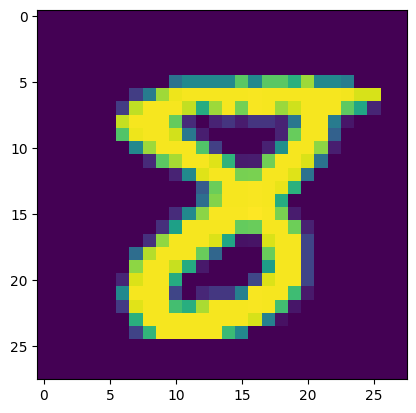

In [11]:
import matplotlib.pyplot as plt
plt.imshow(some_digit.iloc[0].values.reshape(28,28))

In [12]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
from sklearn.multiclass import OneVsRestClassifier
ovr=OneVsRestClassifier(SVC())
ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [14]:
some_digit.iloc[0].values.shape

(784,)

In [15]:
ovr.predict(some_digit.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

array([8], dtype=uint8)

In [16]:
ovr.decision_function(some_digit.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

array([[-2.68768637, -2.19327673, -1.50777302, -1.38766998, -2.74603941,
        -1.98753738, -2.99236967, -2.66657812,  1.55251371, -2.83795541]])

In [17]:
#cross_val
from sklearn.model_selection import cross_val_predict
y_predict=cross_val_predict(ovr,X_train,y_train,cv=3)

In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_train,y_predict)

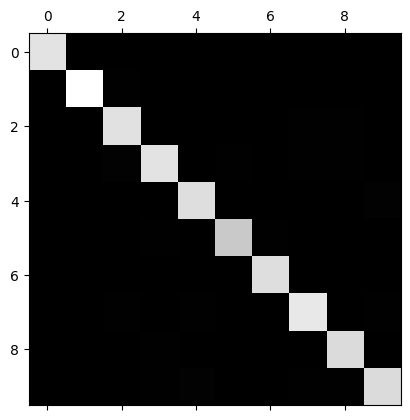

In [19]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [20]:
row_sums=conf_mx.sum(axis=1,keepdims=True)

In [21]:
norm_conf_mx=conf_mx/row_sums

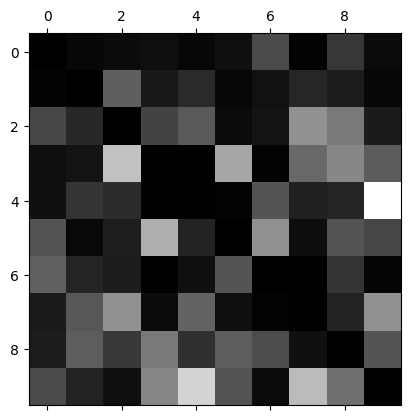

In [23]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)